# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
anyio                        4.2.0
appnope                      0.1.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.11.0
backcall                     0.2.0
beautifulsoup4               4.12.3
bleach                       4.1.0
Brotli                       1.0.9
certifi                      2024.7.4
cffi                         1.16.0
charset-normalizer           3.3.2
comm                         0.2.1
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.6.7
decorator                    5.1.1
defusedxml                   0.7.1
exceptiongroup               1.2.0
executing                    0.8.3
fastjsonschema               2.16.2
f

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [100]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [101]:
data_dir = 'data' 

In [102]:
os.listdir(data_dir) 

['.DS_Store', 'Straws', 'AluminumCans', 'Diapers']

In [103]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [104]:
image_exts


['jpeg', 'jpg', 'bmp', 'png']

In [106]:
print(os.listdir(data_dir))

['.DS_Store', 'Straws', 'AluminumCans', 'Diapers']


In [107]:
import os
import cv2
import imghdr

data_dir = 'data'
image_exts = {'jpeg', 'png', 'jpg', 'gif'}  # Define your image extensions

for image_class in os.listdir(data_dir):
    # Build the full path to the class directory
    class_path = os.path.join(data_dir, image_class)

    if not os.path.isdir(class_path):
        continue

    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)

        # Skip if it's not a file
        if not os.path.isfile(image_path):
            continue

        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Image not in ext list {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}')
            # Uncomment the next line if you want to delete problematic images
            # os.remove(image_path)


Image not in ext list data/Straws/Starbucks3.jpg
Image not in ext list data/Straws/p0gqm0pb.jpg
Image not in ext list data/Straws/image46.webp
Image not in ext list data/Straws/image50.webp
Image not in ext list data/Straws/shopping13.jpg
Image not in ext list data/Straws/image51.webp
Image not in ext list data/Straws/.DS_Store
Image not in ext list data/Straws/shopping11.jpg
Image not in ext list data/Straws/drinking-straw.jpg
Image not in ext list data/Straws/image40.webp
Image not in ext list data/Straws/1584731089244.webp
Image not in ext list data/Straws/image56.webp
Image not in ext list data/Straws/shopping.jpg
Image not in ext list data/Straws/image57.webp
Image not in ext list data/Straws/shopping8.jpg
Image not in ext list data/Straws/image54.webp
Image not in ext list data/Straws/shopping5.jpg
Image not in ext list data/Straws/image39.webp
Image not in ext list data/Straws/skynews-paper-straws-straws_6261930.jpg
Image not in ext list data/Straws/shopping7.jpg
Image not in ex

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


# 3. Load Data

In [273]:
import numpy as np
from matplotlib import pyplot as plt

In [274]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 356 files belonging to 3 classes.


In [275]:
data_iterator = data.as_numpy_iterator()

In [276]:
batch = data_iterator.next()

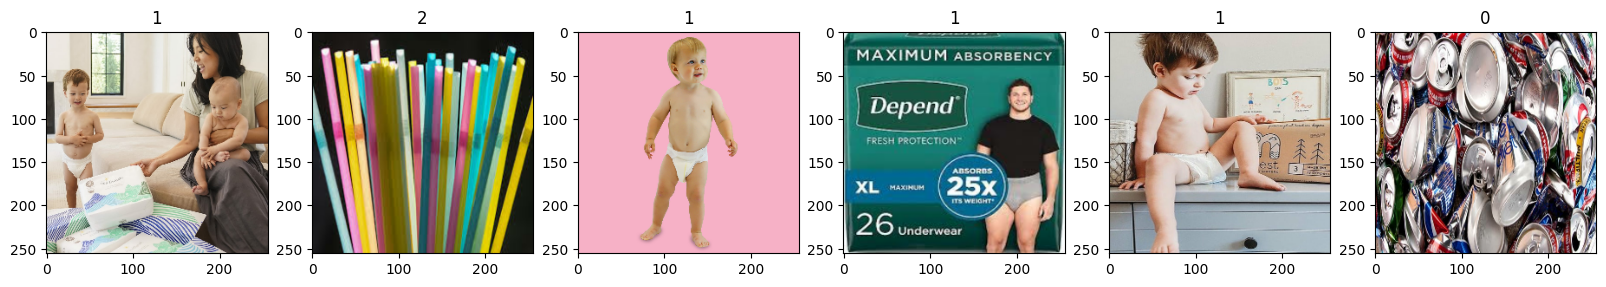

In [277]:
fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#0 - Aluminum Cans
#1 - Diapers
#2 - Straws

In [278]:
scaled = batch[0] / 255

In [279]:
scaled.max()


1.0

# 4. Scale Data

In [280]:
data = data.map(lambda x,y: (x/255, y))

In [281]:
scaled_iterator = data.as_numpy_iterator()

In [282]:
batch = scaled_iterator.next()

2024-08-28 16:22:59.735120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


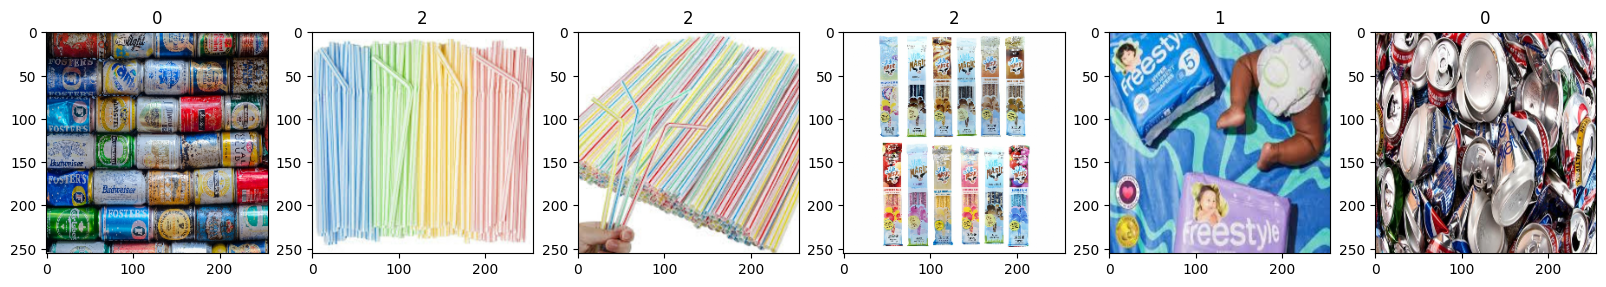

2024-08-28 16:23:06.375462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:23:09.426555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:23:09.426577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


In [283]:
fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

#0 - Aluminum Cans
#1 - Diapers
#2 - Straws

# 5. Split Data

In [225]:
batch

(array([[[[234.       , 216.       , 214.       ],
          [234.81836  , 220.0918   , 217.27344  ],
          [232.21094  , 217.51367  , 211.72461  ],
          ...,
          [232.78906  , 238.69727  ,  16.03711  ],
          [233.9961   , 237.45508  ,   1.453125 ],
          [252.       , 235.       ,   8.       ]],
 
         [[220.90625  , 219.27344  , 216.45508  ],
          [217.70633  , 224.03494  , 218.3891   ],
          [216.48949  , 229.02345  , 221.10217  ],
          ...,
          [244.66646  , 236.48993  , 141.83908  ],
          [243.67255  , 236.41295  , 113.21512  ],
          [238.90625  , 236.63672  ,  33.36914  ]],
 
         [[227.06445  , 218.60547  , 222.57812  ],
          [221.26082  , 219.52133  , 220.79117  ],
          [214.62468  , 221.4133   , 221.17487  ],
          ...,
          [251.69742  , 240.81685  , 222.49788  ],
          [251.46109  , 242.07707  , 209.76358  ],
          [245.06445  , 241.1836   , 170.08594  ]],
 
         ...,
 
         [[2

In [213]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [214]:
train_size

8

In [215]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [216]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [217]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [218]:
model = Sequential()

In [219]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [220]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [221]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [222]:
logdir='logs'

In [223]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [224]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/8 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4195 - loss: 0.4299

2024-08-28 16:07:57.898388: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


6/8 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.4138 - loss: 0.3674

2024-08-28 16:07:59.346493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4063 - loss: 0.0868

2024-08-28 16:08:00.871405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:00.943278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:03.687661: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:03.687676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.4032 - loss: -0.0863 - val_accuracy: 0.2656 - val_loss: -5.7271
Epoch 2/20
1/8 ━━━━━━━━━━━━━━━━━━━━ 5s 810ms/step - accuracy: 0.3750 - loss: -8.3312

2024-08-28 16:08:05.747344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:05.747395: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-08-28 16:08:05.829011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


2/8 ━━━━━━━━━━━━━━━━━━━━ 3s 562ms/step - accuracy: 0.4062 - loss: -9.9066

2024-08-28 16:08:06.039328: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.3914 - loss: -14.9206

2024-08-28 16:08:08.008410: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:08.008446: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-08-28 16:08:08.316629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:08.329248: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 455ms/step - accuracy: 0.3896 - loss: -15.0625 - val_accuracy: 0.4062 - val_loss: -43.8672
Epoch 3/20


2024-08-28 16:08:09.113037: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1/8 ━━━━━━━━━━━━━━━━━━━━ 4s 704ms/step - accuracy: 0.4062 - loss: -103.8718

2024-08-28 16:08:09.388253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


2/8 ━━━━━━━━━━━━━━━━━━━━ 3s 538ms/step - accuracy: 0.4219 - loss: -101.8780

2024-08-28 16:08:09.945168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:09.945200: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.4131 - loss: -102.2866

2024-08-28 16:08:11.823649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:11.891881: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:11.985147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:11.985164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 440ms/step - accuracy: 0.4093 - loss: -103.0809 - val_accuracy: 0.3281 - val_loss: 13.0225
Epoch 4/20
1/8 ━━━━━━━━━━━━━━━━━━━━ 5s 834ms/step - accuracy: 0.5000 - loss: -34.4190

2024-08-28 16:08:13.350952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:13.451515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:13.451572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-08-28 16:08:13.452460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.3894 - loss: -215.2210

2024-08-28 16:08:15.849626: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:15.889582: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:15.908257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:15.908291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 432ms/step - accuracy: 0.3891 - loss: -229.9614 - val_accuracy: 0.2344 - val_loss: -236.4269
Epoch 5/20
1/8 ━━━━━━━━━━━━━━━━━━━━ 4s 676ms/step - accuracy: 0.3438 - loss: -951.7757

2024-08-28 16:08:16.974699: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:17.069447: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:17.069465: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-08-28 16:08:17.271029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.3626 - loss: -1329.8368

2024-08-28 16:08:19.312905: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:19.647198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:19.802823: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:19.802860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 453ms/step - accuracy: 0.3627 - loss: -1344.3293 - val_accuracy: 0.3281 - val_loss: -3836.4028
Epoch 6/20


2024-08-28 16:08:20.605289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1/8 ━━━━━━━━━━━━━━━━━━━━ 5s 831ms/step - accuracy: 0.3750 - loss: -6101.8926

2024-08-28 16:08:21.029645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:21.221621: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:21.222166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.3897 - loss: -3908.6704

2024-08-28 16:08:23.232476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:23.513704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:23.687505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:23.687528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 437ms/step - accuracy: 0.3881 - loss: -3795.9768 - val_accuracy: 0.2969 - val_loss: -8492.4072
Epoch 7/20
1/8 ━━━━━━━━━━━━━━━━━━━━ 5s 728ms/step - accuracy: 0.3750 - loss: -147.1582

2024-08-28 16:08:24.672551: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:24.851227: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:24.851251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


2/8 ━━━━━━━━━━━━━━━━━━━━ 2s 496ms/step - accuracy: 0.4297 - loss: -4214.9180

2024-08-28 16:08:25.283206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.3951 - loss: -4798.7563

2024-08-28 16:08:27.035577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:27.118595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:27.241759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:27.241785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 448ms/step - accuracy: 0.3933 - loss: -4901.8306 - val_accuracy: 0.2969 - val_loss: -24368.9473
Epoch 8/20


2024-08-28 16:08:28.367437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:28.367470: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


1/8 ━━━━━━━━━━━━━━━━━━━━ 5s 797ms/step - accuracy: 0.4062 - loss: -12927.5557

2024-08-28 16:08:28.783372: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:28.913599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.4171 - loss: -5007.8970

2024-08-28 16:08:30.923486: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:31.007182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 436ms/step - accuracy: 0.4133 - loss: -5497.5513 - val_accuracy: 0.3906 - val_loss: -22561.1523
Epoch 9/20


2024-08-28 16:08:31.744390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:31.744428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-08-28 16:08:32.181279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1/8 ━━━━━━━━━━━━━━━━━━━━ 5s 779ms/step - accuracy: 0.4062 - loss: -7647.9336

2024-08-28 16:08:32.430307: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:32.430337: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-08-28 16:08:32.581523: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.3646 - loss: -23382.4922

2024-08-28 16:08:34.826926: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:35.006043: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:35.006069: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-08-28 16:08:35.353020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 455ms/step - accuracy: 0.3649 - loss: -23356.9688 - val_accuracy: 0.4219 - val_loss: -51855.7422
Epoch 10/20


2024-08-28 16:08:36.378688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1/8 ━━━━━━━━━━━━━━━━━━━━ 5s 802ms/step - accuracy: 0.3438 - loss: 20963.3828

2024-08-28 16:08:36.584824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:36.584856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-08-28 16:08:36.715775: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.3849 - loss: 7810.9736 

2024-08-28 16:08:38.774448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:39.024673: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:39.034993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:39.035010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 445ms/step - accuracy: 0.3838 - loss: 4627.0024 - val_accuracy: 0.3125 - val_loss: -1250.8184
Epoch 11/20


2024-08-28 16:08:39.765445: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:40.263880: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:40.263899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


1/8 ━━━━━━━━━━━━━━━━━━━━ 6s 961ms/step - accuracy: 0.4062 - loss: -31815.6738

2024-08-28 16:08:40.493571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.3953 - loss: -44447.1172

2024-08-28 16:08:42.696072: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:43.112495: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:43.112526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-08-28 16:08:43.217762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 426ms/step - accuracy: 0.3952 - loss: -44829.9062 - val_accuracy: 0.3906 - val_loss: -72566.2344
Epoch 12/20


2024-08-28 16:08:43.954013: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1/8 ━━━━━━━━━━━━━━━━━━━━ 5s 788ms/step - accuracy: 0.3438 - loss: -149091.5469

2024-08-28 16:08:44.454671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


2/8 ━━━━━━━━━━━━━━━━━━━━ 3s 543ms/step - accuracy: 0.3906 - loss: -124693.9766

2024-08-28 16:08:44.862977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:44.863013: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.3772 - loss: -87415.0234

2024-08-28 16:08:46.850254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:46.850273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-08-28 16:08:47.012520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:47.319917: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 463ms/step - accuracy: 0.3765 - loss: -89665.0312 - val_accuracy: 0.4688 - val_loss: 46737.8164
Epoch 13/20


2024-08-28 16:08:48.212707: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:48.212730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


1/8 ━━━━━━━━━━━━━━━━━━━━ 5s 830ms/step - accuracy: 0.3125 - loss: -94533.6328

2024-08-28 16:08:48.626441: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:48.796106: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.3891 - loss: -59068.8867

2024-08-28 16:08:50.662855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:51.044425: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:51.044600: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-08-28 16:08:51.373128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 463ms/step - accuracy: 0.3884 - loss: -58986.4844 - val_accuracy: 0.3125 - val_loss: -171527.0938
Epoch 14/20


2024-08-28 16:08:52.058532: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:52.058553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-08-28 16:08:52.122283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


2/8 ━━━━━━━━━━━━━━━━━━━━ 3s 560ms/step - accuracy: 0.4453 - loss: 107109.3047

2024-08-28 16:08:52.910963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.4346 - loss: -27859.4453

2024-08-28 16:08:54.933335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:55.289997: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:55.458738: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:55.458789: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 481ms/step - accuracy: 0.4319 - loss: -36758.4023 - val_accuracy: 0.4219 - val_loss: -70488.1250
Epoch 15/20


2024-08-28 16:08:56.171430: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:56.351192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:56.530994: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:56.531016: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.3885 - loss: -253558.1406

2024-08-28 16:08:58.813698: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:59.579594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:08:59.579618: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-08-28 16:08:59.677394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 459ms/step - accuracy: 0.3857 - loss: -271452.7188 - val_accuracy: 0.3438 - val_loss: -627007.7500
Epoch 16/20


2024-08-28 16:09:00.356605: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:09:00.356629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-08-28 16:09:00.421418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


2/8 ━━━━━━━━━━━━━━━━━━━━ 3s 558ms/step - accuracy: 0.4219 - loss: -266531.6875

2024-08-28 16:09:01.073567: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.3844 - loss: -429881.8750

2024-08-28 16:09:03.205561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:09:03.260874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:09:03.260889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-08-28 16:09:03.724053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 488ms/step - accuracy: 0.3834 - loss: -442574.1562 - val_accuracy: 0.4531 - val_loss: 32341.0000
Epoch 17/20


2024-08-28 16:09:04.187730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:09:04.577480: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1/8 ━━━━━━━━━━━━━━━━━━━━ 5s 810ms/step - accuracy: 0.3438 - loss: 706208.5625

2024-08-28 16:09:05.079184: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:09:05.079218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.3549 - loss: -273427.4062

2024-08-28 16:09:07.386936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:09:07.464010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:09:07.795527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:09:07.796273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 467ms/step - accuracy: 0.3559 - loss: -319273.5938 - val_accuracy: 0.3281 - val_loss: -2884148.7500
Epoch 18/20


2024-08-28 16:09:08.441606: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


2/8 ━━━━━━━━━━━━━━━━━━━━ 3s 575ms/step - accuracy: 0.3359 - loss: -967862.6250

2024-08-28 16:09:09.289230: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:09:09.289260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-08-28 16:09:09.371489: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.3551 - loss: -956131.1875

2024-08-28 16:09:11.377143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:09:11.811346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:09:11.926617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:09:11.926647: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 497ms/step - accuracy: 0.3573 - loss: -1018524.5000 - val_accuracy: 0.3438 - val_loss: -2808976.2500
Epoch 19/20


2024-08-28 16:09:12.495978: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:09:12.993968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:09:13.119876: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:09:13.122158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.3695 - loss: -1353949.0000

2024-08-28 16:09:15.759173: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:09:15.835561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:09:15.835592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-08-28 16:09:16.023292: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 471ms/step - accuracy: 0.3688 - loss: -1341384.5000 - val_accuracy: 0.3125 - val_loss: -1868350.6250
Epoch 20/20


2024-08-28 16:09:16.694530: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:09:17.097323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:09:17.097362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB
2024-08-28 16:09:17.197168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.3656 - loss: -1800577.5000

2024-08-28 16:09:19.693310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:09:20.389414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:09:20.435834: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-28 16:09:20.435855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: cHRM chunk does not match sRGB


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 463ms/step - accuracy: 0.3666 - loss: -1746381.5000 - val_accuracy: 0.4219 - val_loss: -2058624.0000


# 8. Plot Performance

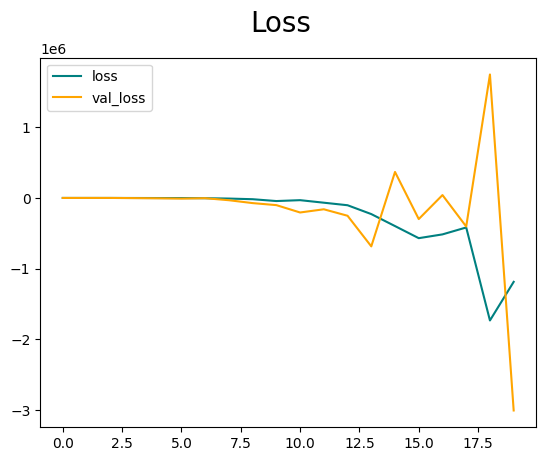

In [146]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

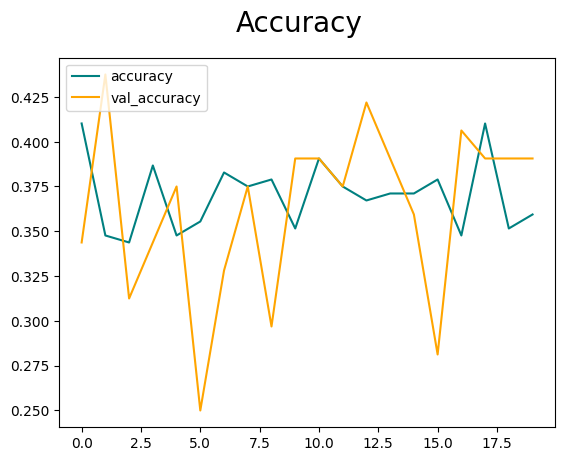

In [147]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [80]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [81]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [83]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [84]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [85]:
import cv2

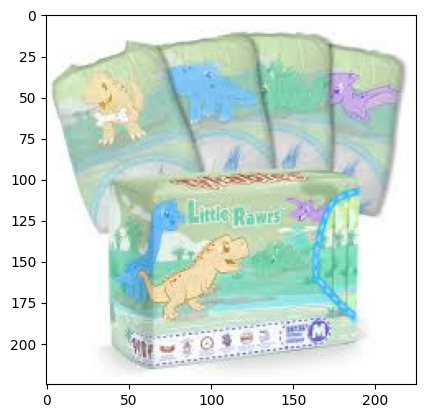

In [93]:
img = cv2.imread('diaperTest.jpeg')
plt.imshow(img)
plt.show()

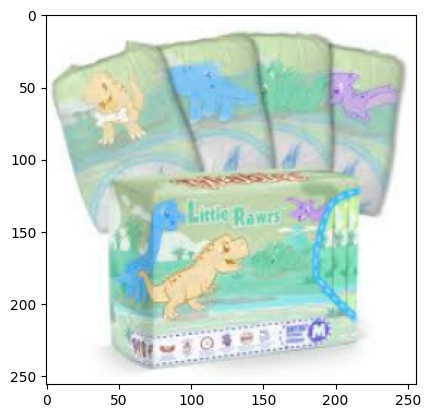

In [94]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [95]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [96]:
yhat

array([[0.5406326]], dtype=float32)

In [97]:
if yhat > 0.5: 
    print(f'Predicted class is Non-Recyclable')
else:
    print(f'Predicted class is Recyclable')

Predicted class is Non-Recyclable


# 11. Save the Model

In [98]:
from tensorflow.keras.models import load_model

In [99]:
model.save(os.path.join('models','imageclassifier.h5'))

In [46]:
new_model = load_model('imageclassifier.h5')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)